In [1]:
import PyPDF2
import matplotlib.pyplot as plt
import csv
import pandas as pd
from textblob import TextBlob as txt

In [96]:
pdf_file = open('West-Side-Story.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)
number_of_pages = read_pdf.getNumPages()
content = []
for i in range(0, number_of_pages):
    page = read_pdf.getPage(i-1)
    content.append(page)
print(len(content))

137


In [97]:
newfile = open(r'West-Side-Story.txt', 'a', encoding="utf-8")
for i in content:
    page_content = i.extractText()
    write = newfile.writelines(page_content)
newfile.close()
print (page_content)

     135.MARêA(CONTÕD)
All of you? I can kill now because I hate now.She points the gun at Quique and the other Sharks. MARêA(CONTÕD)
I hate now.Then she faces Chino again. MARêA(CONTÕD)
How many can I kill, Chino? And still have one bullet left for me?Mar™a stares at the gun, then she forces herself to look back at TonyÕs body. ItÕs very hard for her to do this. She drops the gun and runs back to him. She throws herself over him and  kisses him. MARêA(CONTÕD)
Te adoro, Anton. Ice goes to TonyÕs body. Tiger, Big Deal and Diesel approach, then hesitate and stop as Ice tries to help Mar™a stand. She pulls away and throws herself protectively across Tony.MARêA(CONTÕD)
No, donÕt touch him! Ice steps back. Braulio comes forward, leans down to Mar™a and whispers to her. BRAULIOMar™a, ya es tiempo. Vente con nosotros.She lets him help her to her feet. Anybodys goes to Ice and leads him back to TonyÕs body. As Anybodys kneels by TonyÕs head and lays his arms across his chest, Ice looks to Big 

In [98]:
title = 'West-Side-Story.txt'
file = open(title, 'r', encoding='latin-1')
pol = lambda x: txt(x).sentiment.polarity
sub = lambda x: txt(x).sentiment.subjectivity
for i in file:
    polarity = pol(i)
    subjectivity = sub(i)
movie_name = title.split('.')
print(polarity,', ', subjectivity)

-0.09918300653594771 ,  0.2545751633986928


In [58]:
with open('sentiments.csv', 'a', newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow(['Movie_name', 'Polarity', 'Subjectivity'])
    

In [99]:
with open('sentiments.csv', 'a', newline='') as f:
    thewriter = csv.writer(f)
    thewriter.writerow([movie_name[0], polarity, subjectivity])

In [102]:
data = pd.read_csv('sentiments.csv')
data = data.drop(data.index[[3, 7, 8]])
data.head(11)

,Movie_name,Polarity,Subjectivity
0,dont look up,0.06440045049232657,0.4673317534506674
1,coda,0.06858489388022629,0.5138331180496785
2,belfast,0.06411561775815663,0.46731080585710877
4,dune,0.0,0.0
5,king richard,0.09541444245014412,0.47154905277202264
6,nightmare alley,0.040411323699843606,0.5441247381423896
9,The-Power-of-the-Dog,0.07761473208888252,0.4695051486498535
10,West-Side-Story,-0.09918300653594771,0.2545751633986928


In [104]:
import numpy as np

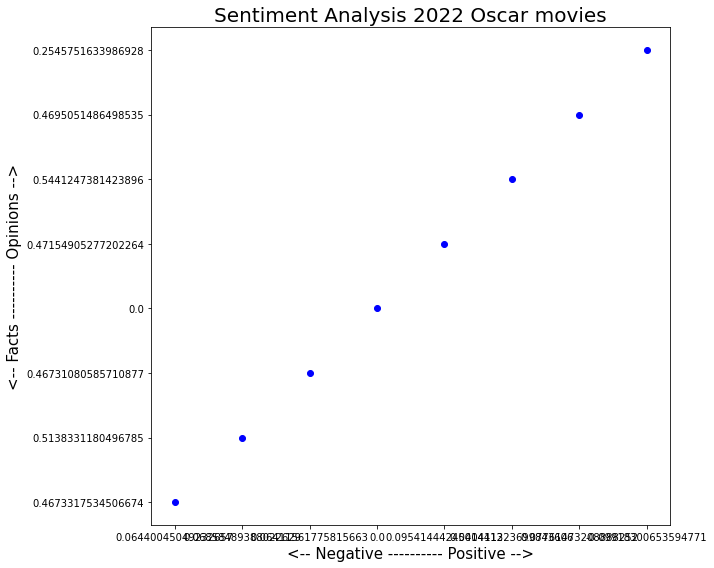

In [107]:
plt.rcParams['figure.figsize'] = [10, 8]
x = data['Polarity']
y = data['Subjectivity']
plt.scatter(x, y, color = 'blue')

#plt.text(x=0.001, y= 0.001, fontsize=10)
#plt.xlim(-.01, .5)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Sentiment Analysis 2022 Oscar movies', fontsize=20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts ---------- Opinions -->', fontsize=15)
plt.tight_layout()
plt.show()